In [0]:
#서명 업로드
from google.colab import files
uploaded = files.upload()

Saving hand_written_korean_classification.hdf5 to hand_written_korean_classification.hdf5


In [137]:
#모듈 다운로드
!sudo apt install tesseract-ocr
!sudo apt install tesseract-ocr tesseract-ocr-script-hang tesseract-ocr-script-hang-vert
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
tesseract-ocr-script-hang is already the newest version (4.00~git24-0e00fe6-1.2).
tesseract-ocr-script-hang-vert is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [0]:
#이미지 뼈대만 남기기
def skeletonize(img):
    img = img.copy()
    skel = img.copy()

    skel[:,:] = 0
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

    while True:
        eroded = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)
        temp = cv2.morphologyEx(eroded, cv2.MORPH_DILATE, kernel)
        temp  = cv2.subtract(img, temp)
        skel = cv2.bitwise_or(skel, temp)
        img[:,:] = eroded[:,:]
        if cv2.countNonZero(img) == 0:
            break

    return skel

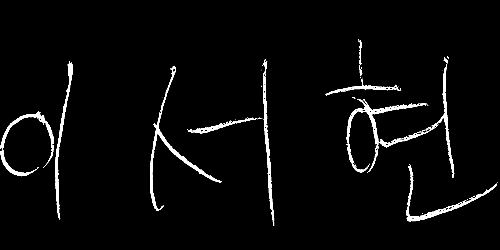

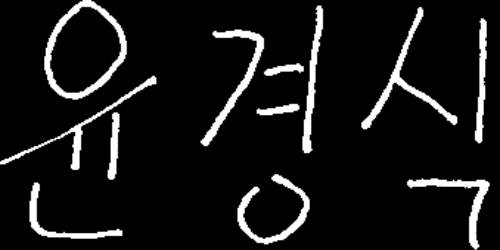

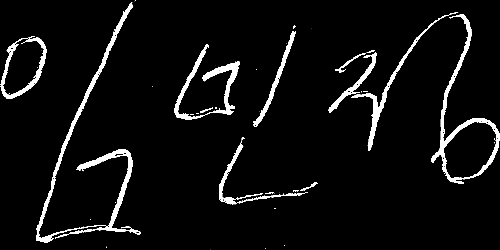

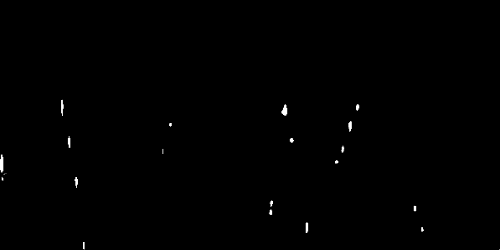

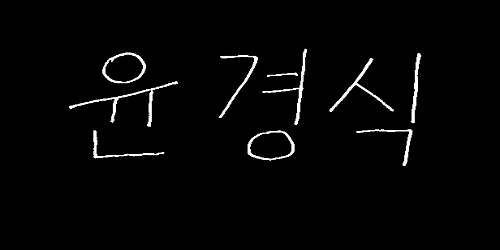

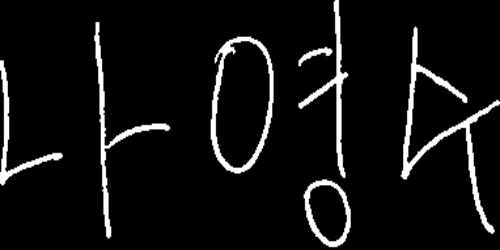

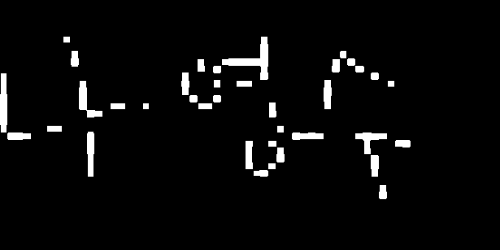

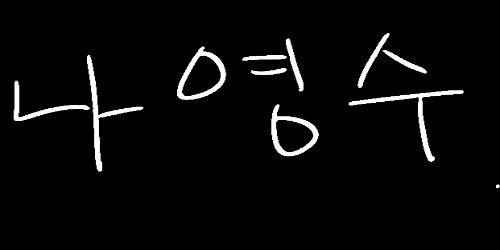

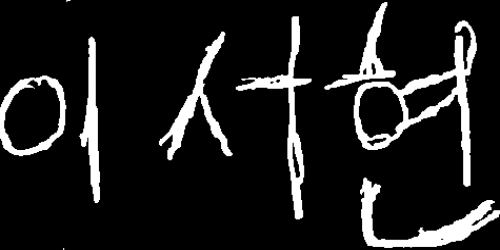

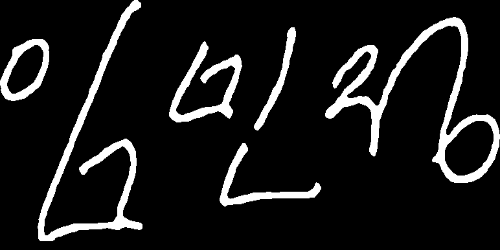

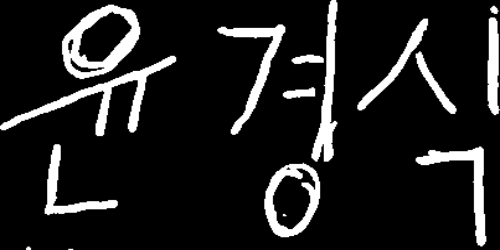

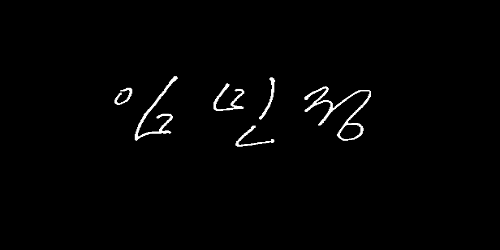

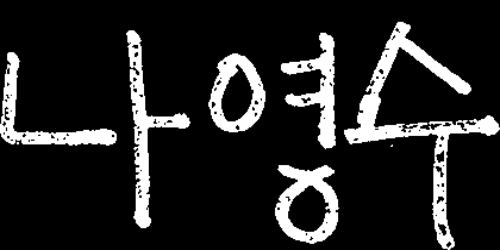

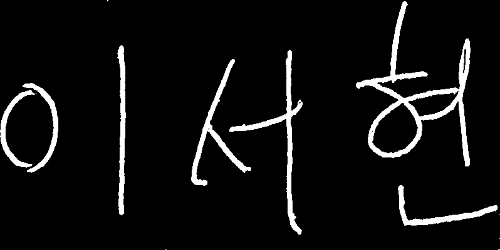

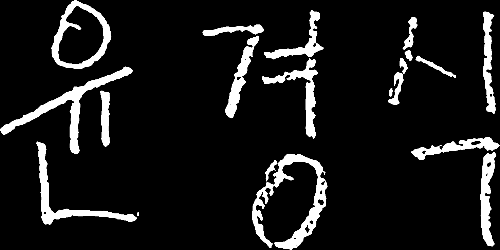

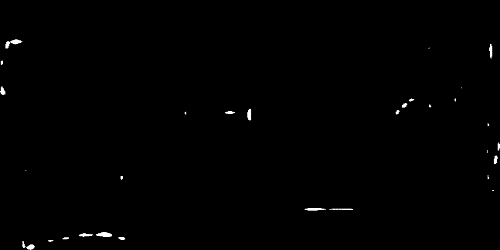

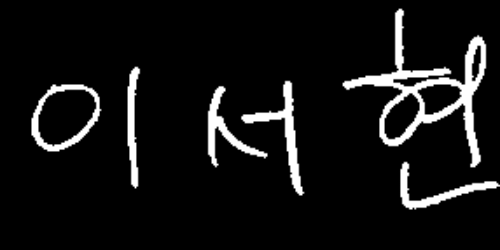

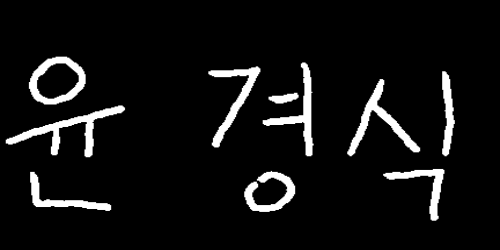

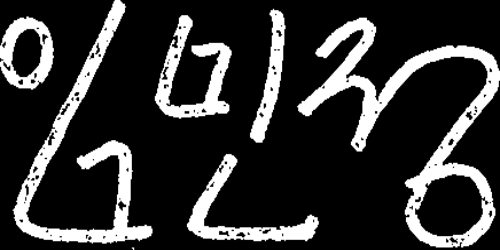

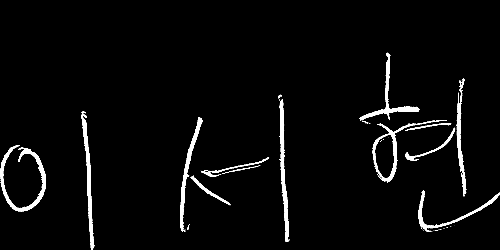

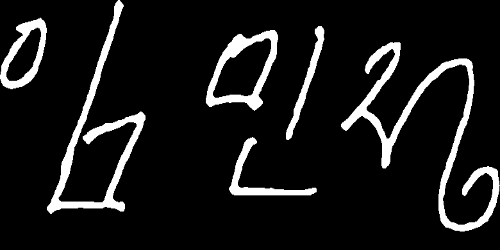

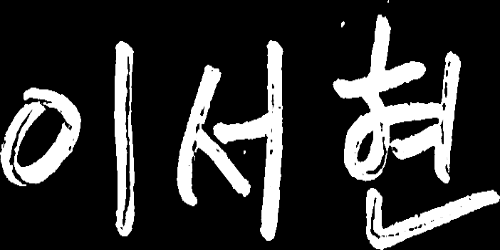

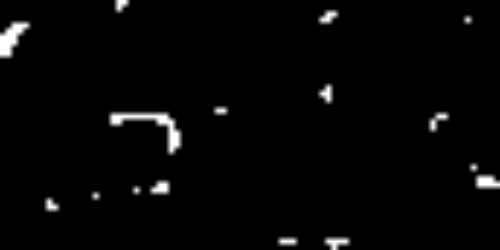

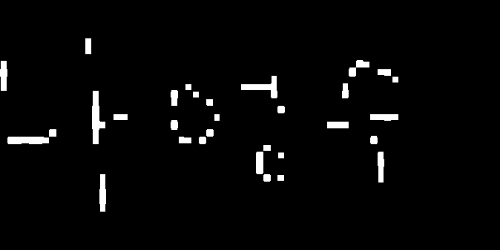

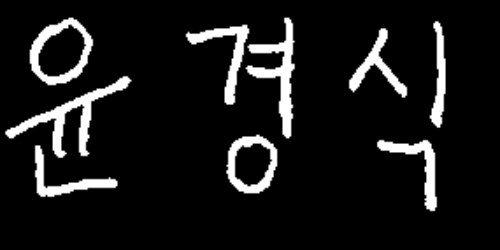

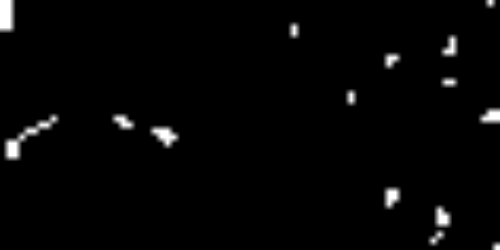

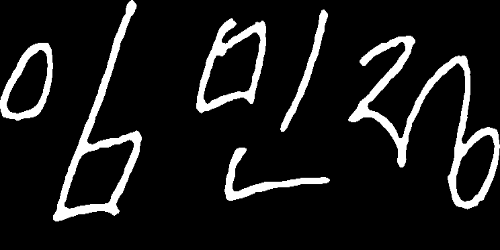

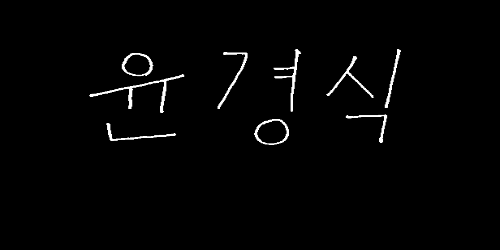

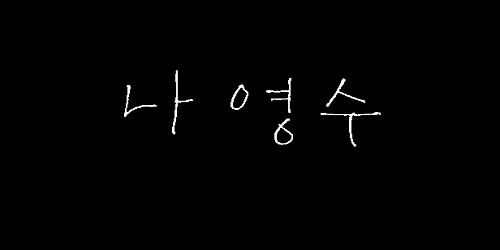

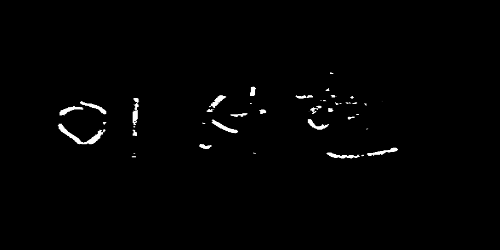

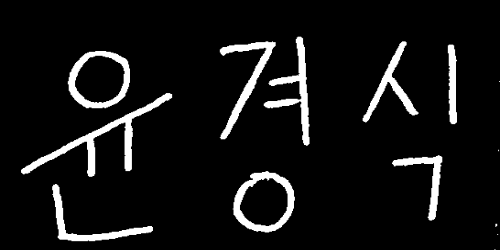

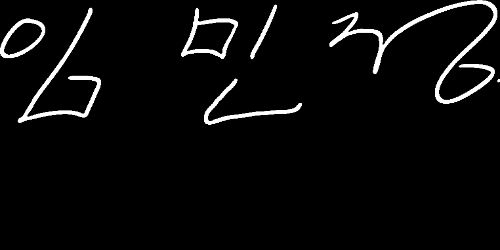

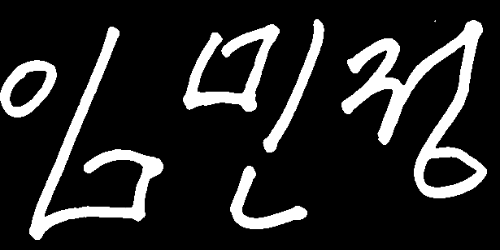

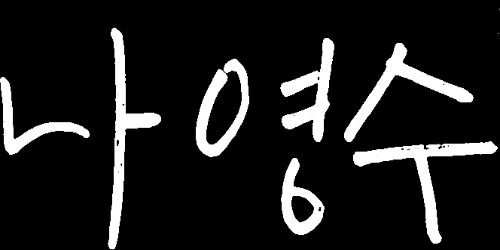

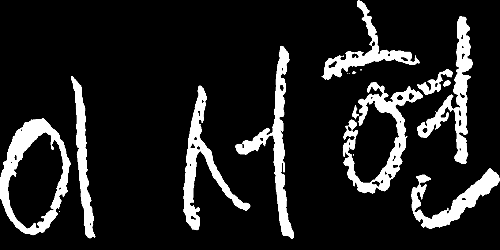

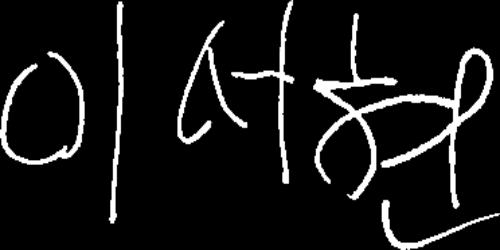

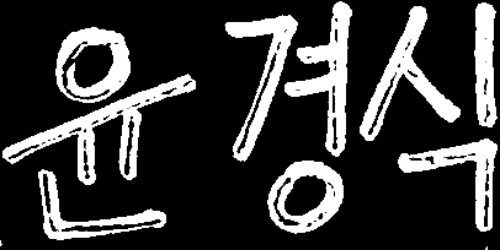

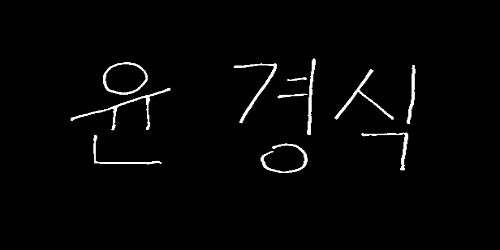

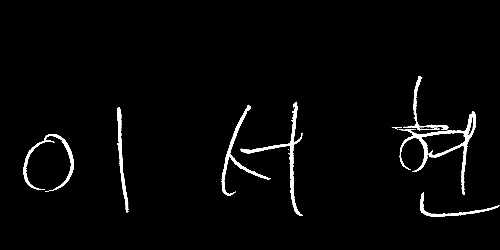

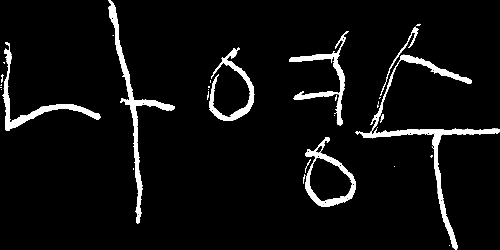

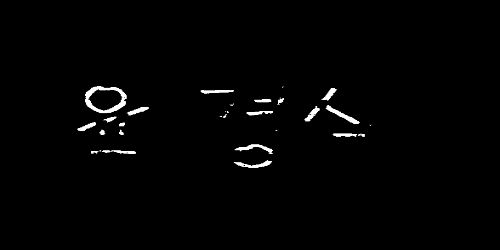

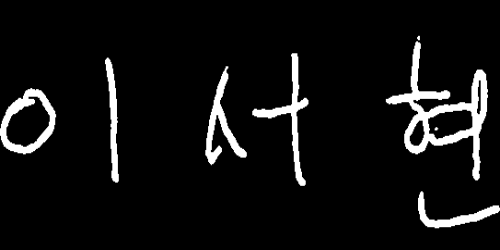

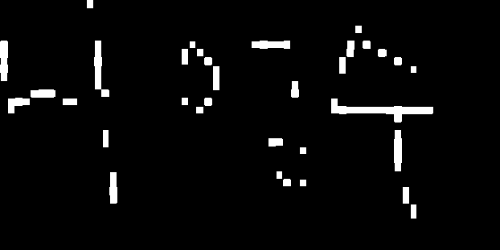

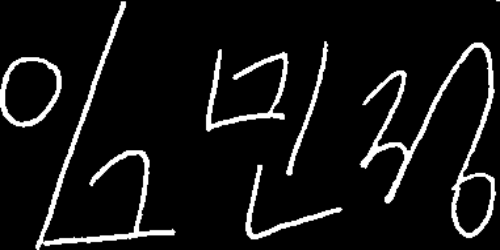

In [138]:
import cv2
import matplotlib.pyplot as plt
import glob
import numpy as np
import pytesseract
import copy
from PIL import Image
from google.colab.patches import cv2_imshow
plt.style.use('dark_background')

#이미지 읽어오기

images = glob.glob('/content/*.bmp')
for i in range(len(images)):
  im = Image.open(images[i])
  newname = images[i].replace('.bmp', '.png')
  im.save(newname)

images.clear()
images = glob.glob('/content/*.png')

img_ori = []
height = np.zeros(len(images))
width = np.zeros(len(images))
channel = np.zeros(len(images))
for i in range(len(images)):
  img_ori.append(cv2.imread(images[i]))
img = []





#이미지 전처리
for i in range(len(img_ori)):
  #img.append(copy.deepcopy(cv2.resize(img_ori[i], (1000,480), cv2.INTER_NEAREST)))
  img.append(copy.deepcopy(img_ori[i]))



  height[i], width[i], channel[i] = img[i].shape

  structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
  imgTopHat = cv2.morphologyEx(img[i], cv2.MORPH_TOPHAT, structuringElement)
  imgBlackHat = cv2.morphologyEx(img[i], cv2.MORPH_BLACKHAT, structuringElement)
  imgGrayscalePlusTopHat = cv2.add(img[i], imgTopHat)
  img[i] = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

  img[i] = cv2.GaussianBlur(img[i], ksize=(3, 3), sigmaX=0)
  ret, img[i] = cv2.threshold(img[i], 100, 255, cv2.THRESH_BINARY_INV)
  img[i] = cv2.cvtColor(img[i], cv2.COLOR_BGR2GRAY)
  pix = img[i]
  

  temp=[]
  for j in range((int)(height[i]/5)):
    if np.all(pix[j]== 0):
      temp.append(j)
    if np.all(pix[(int)(height[i]-j-1)] == 0):
      temp.append((int)(height[i]-j-1))
  pix = pix.tolist()
  temp.sort(reverse=True)
  for j in temp:
    del pix[j]
  pix = np.transpose(pix)
  height[i] = height[i]-len(temp)
  temp.clear()
  pix = np.array(pix)
  for j in range((int)(width[i]/5)):
    if np.all(pix[j] == 0):
      temp.append(j)
    if np.all(pix[(int)(width[i]- j-1)] == 0):
      temp.append((int)(width[i]-j-1))
  pix = pix.tolist()
  temp.sort(reverse=True)
  for j in temp:
    del pix[j]
  pix = np.transpose(pix)
  width[i] = width[i]-len(temp)
  temp.clear()


  img[i] = pix
  img[i] = np.array(img[i], dtype='uint8')
  img[i] = cv2.resize(img[i],(500,250), cv2.INTER_NEAREST)



  cv2_imshow(img[i])




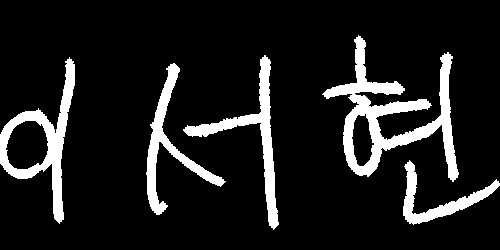

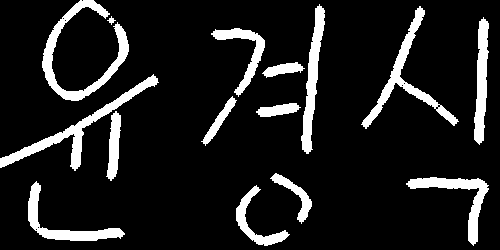

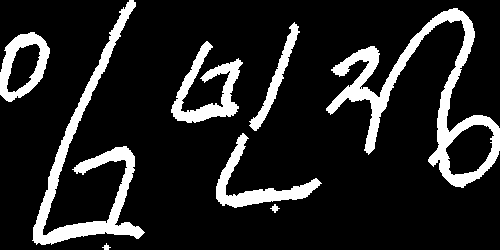

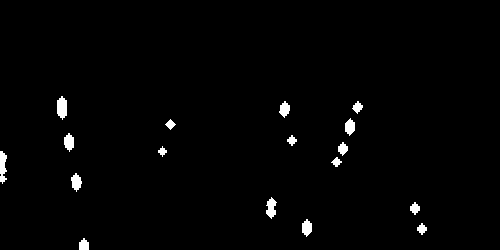

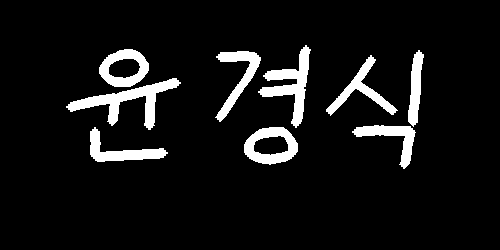

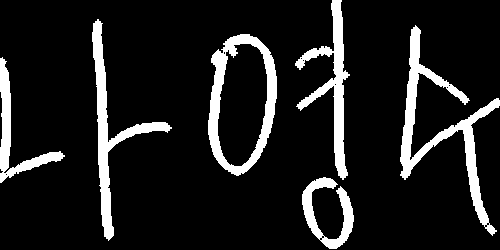

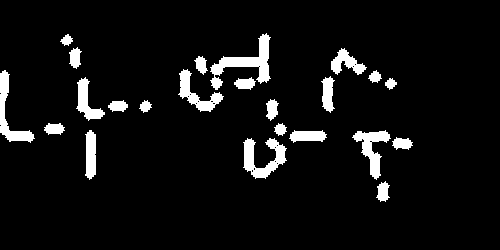

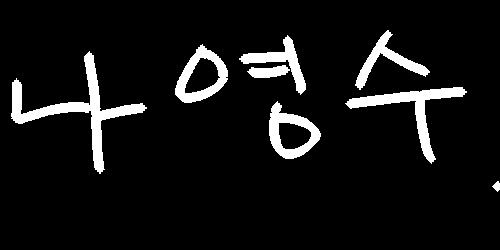

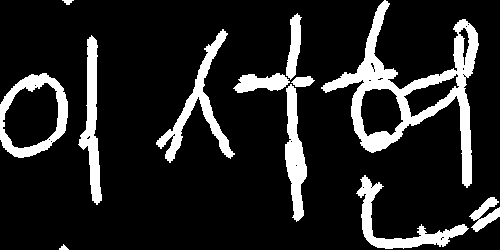

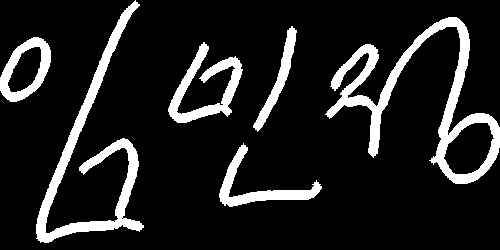

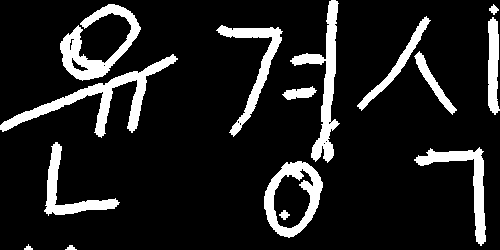

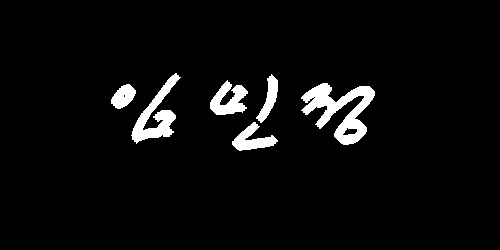

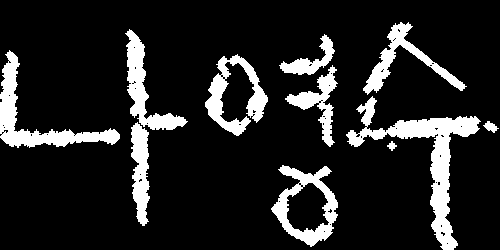

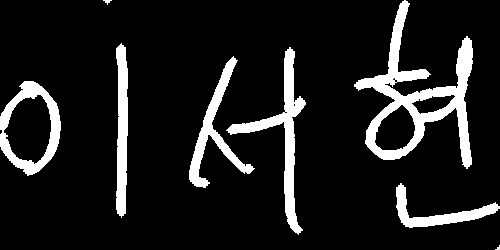

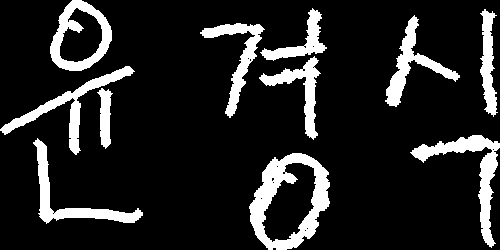

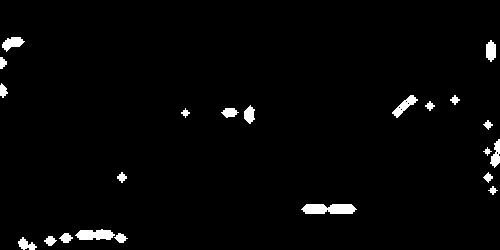

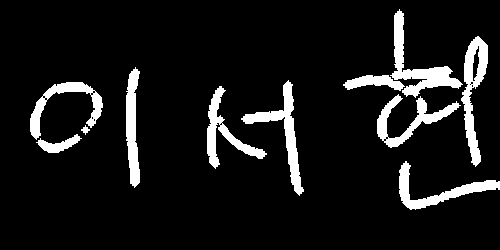

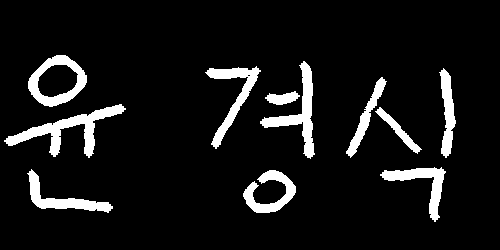

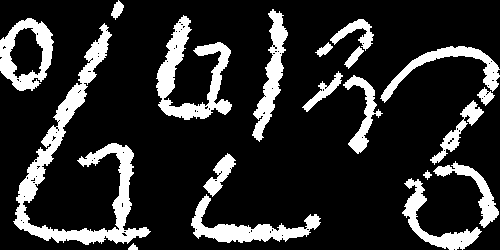

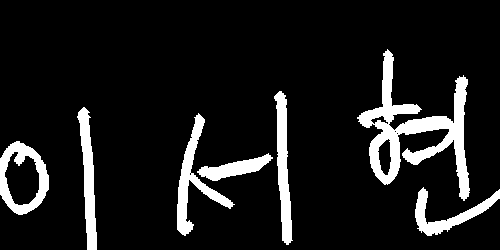

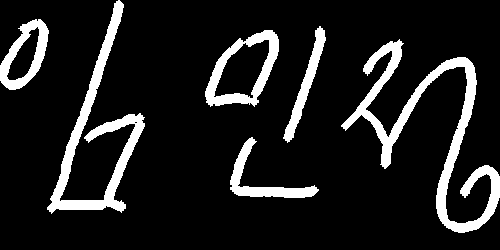

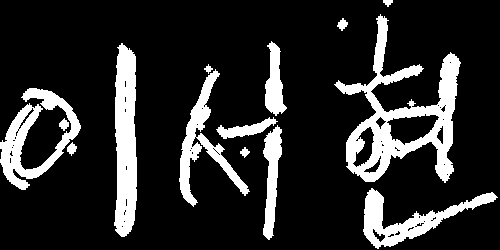

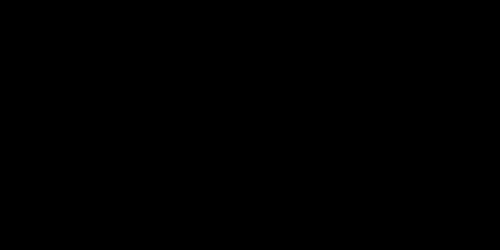

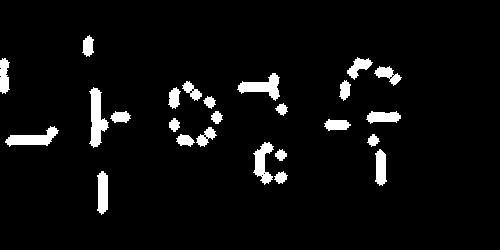

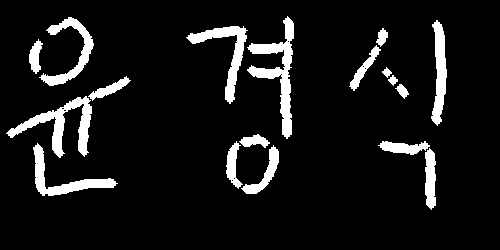

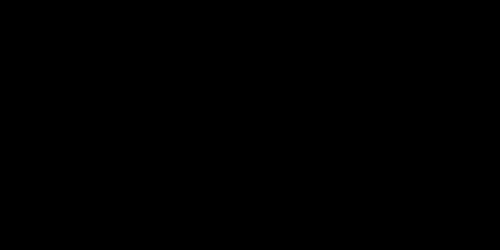

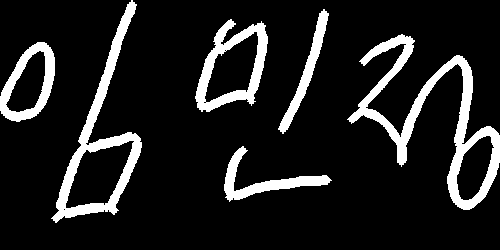

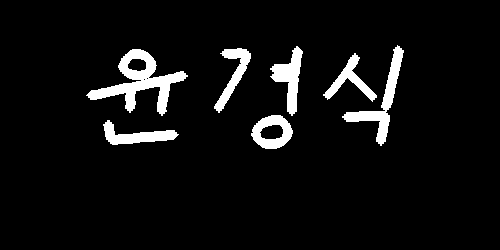

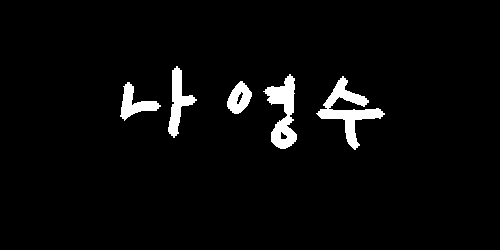

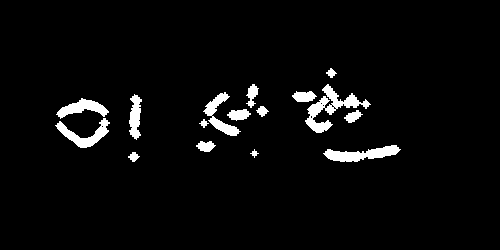

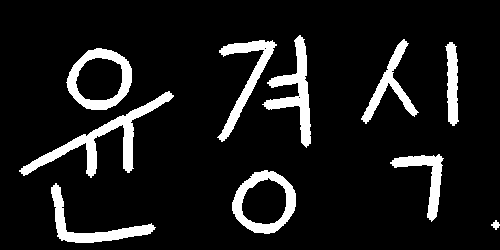

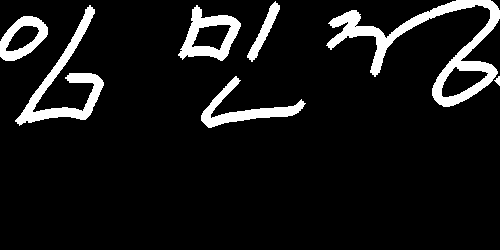

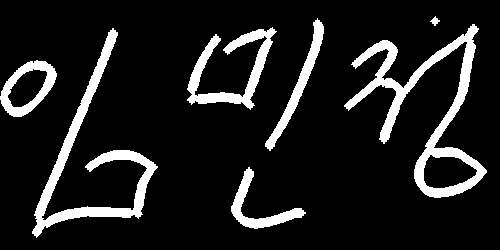

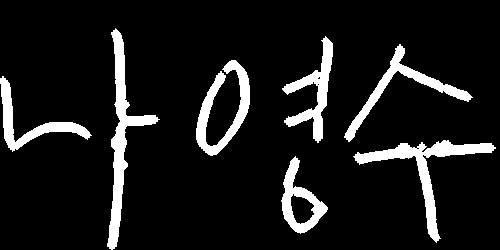

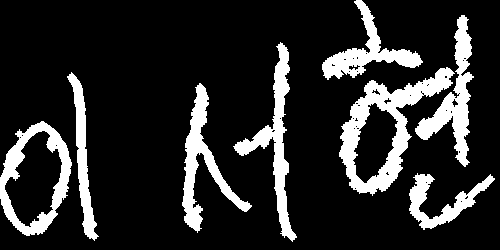

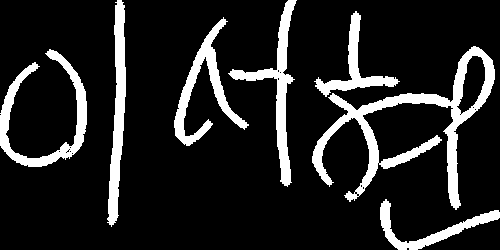

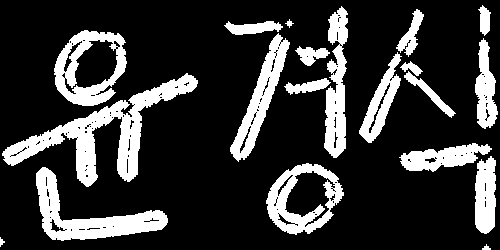

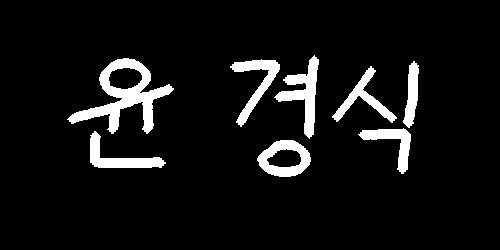

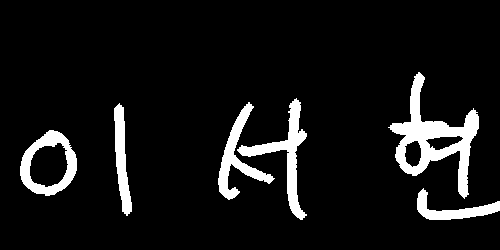

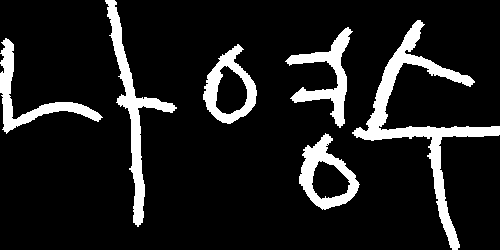

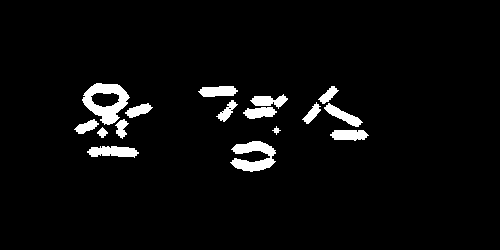

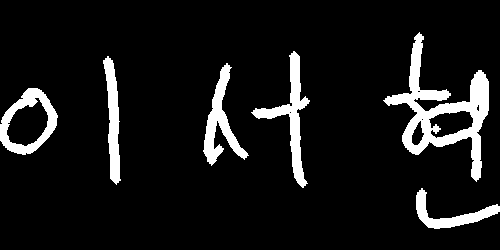

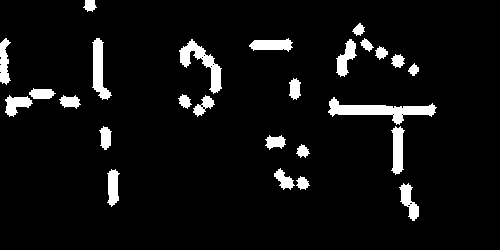

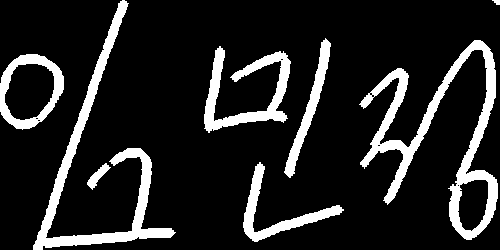

In [139]:
for i in range(len(img)):
  #img[i] = skeletonize(img[i])
  #kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
  #img[i] = cv2.dilate(img[i], kernel, iterations = 1)

  img[i] = skeletonize(img[i])
  img[i] = cv2.GaussianBlur(img[i], ksize=(3,3), sigmaX=0)
  kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
  img[i] = cv2.dilate(img[i], kernel, iterations = 2)
  ret, img[i] = cv2.threshold(img[i], 75, 255, cv2.THRESH_BINARY)


  
  
  #img[i] = cv2.bitwise_not(img[i])

  cv2_imshow(img[i])


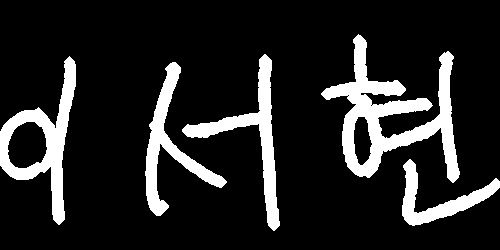

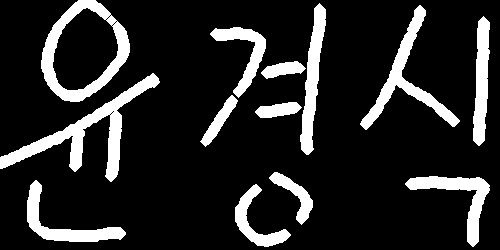

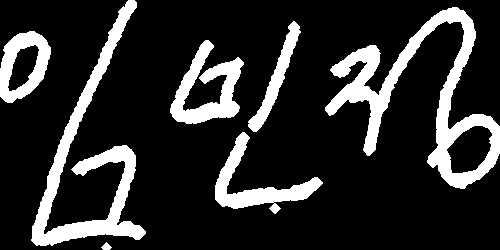

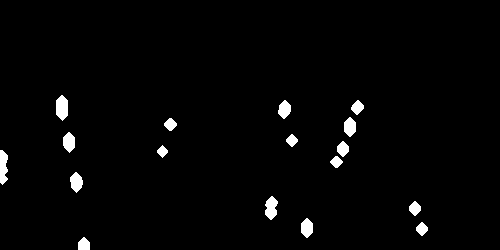

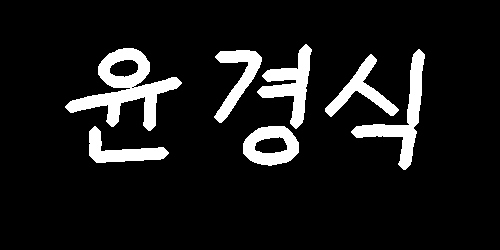

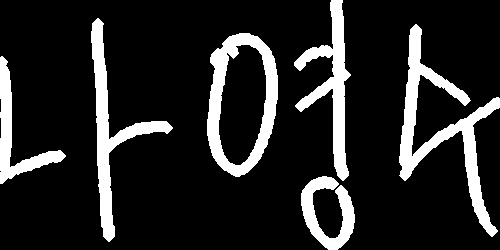

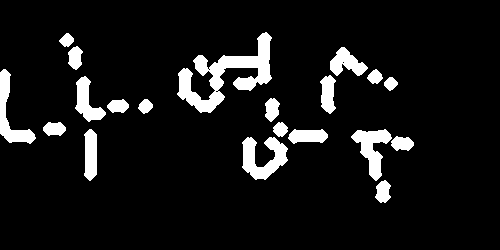

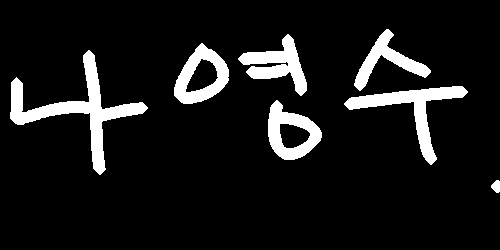

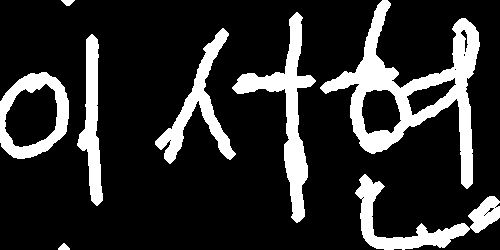

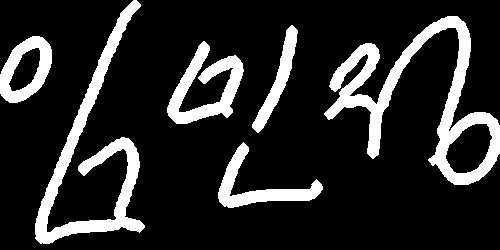

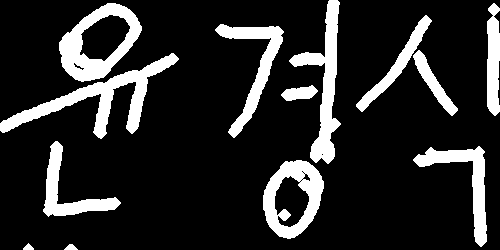

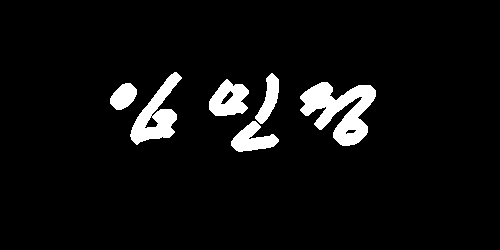

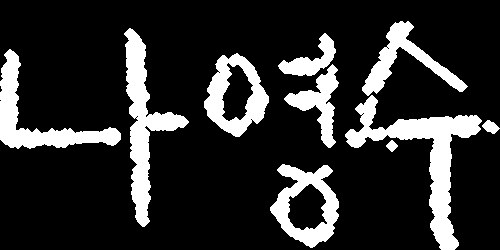

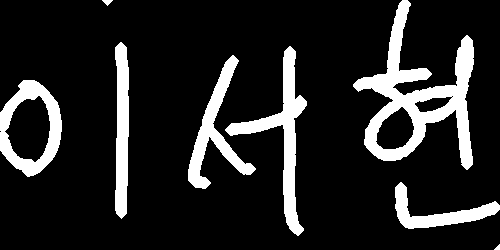

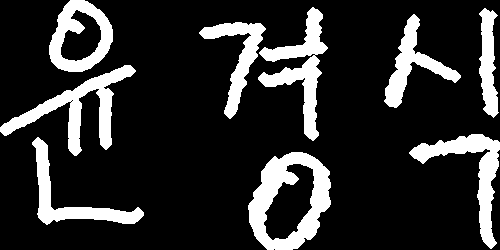

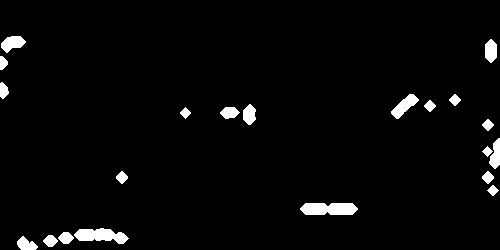

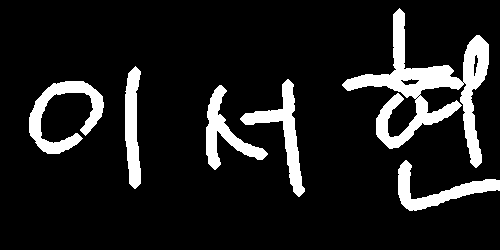

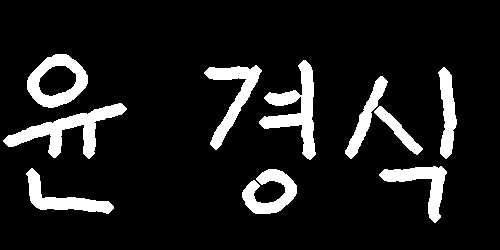

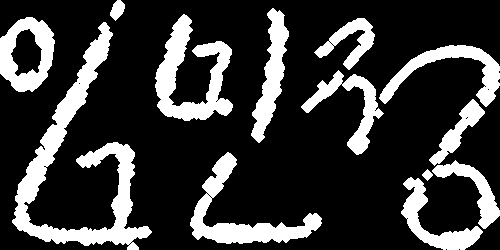

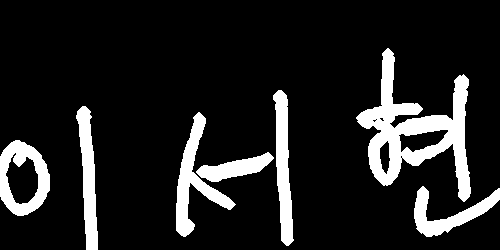

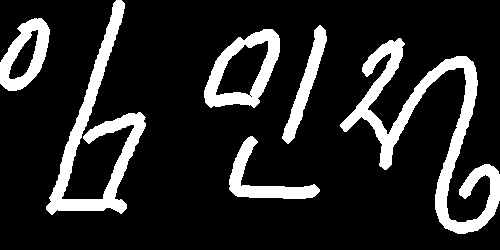

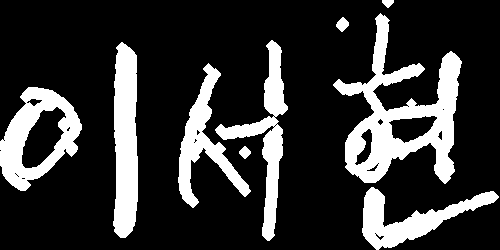

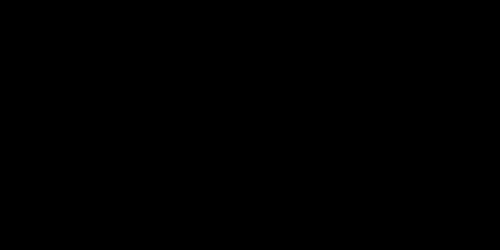

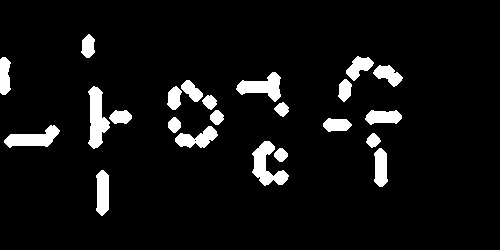

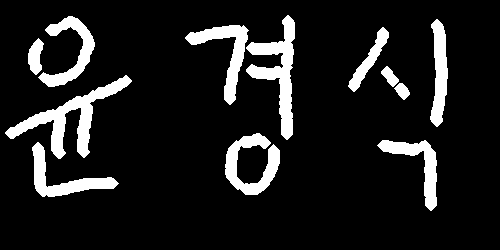

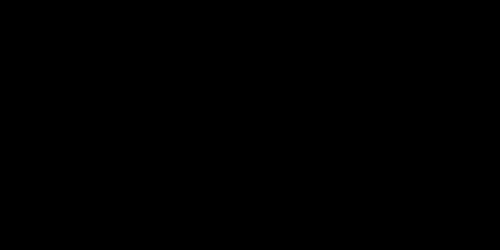

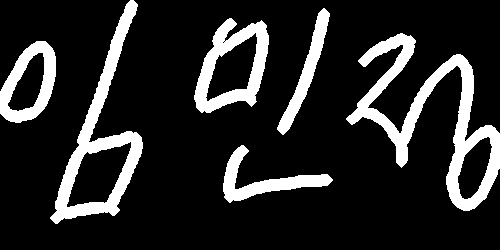

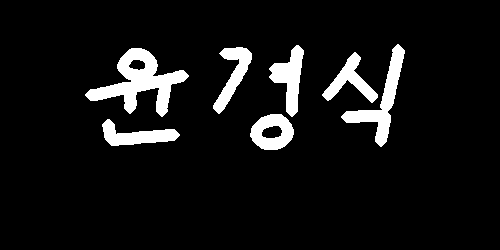

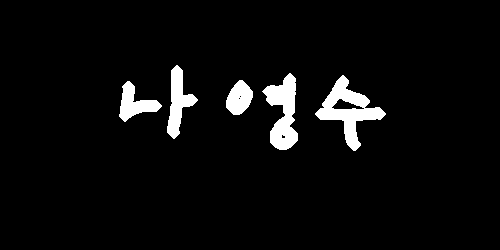

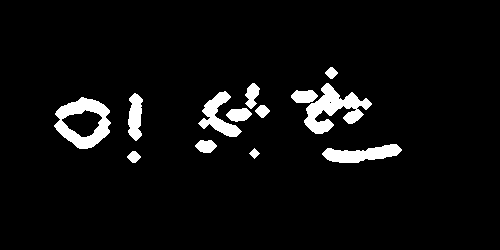

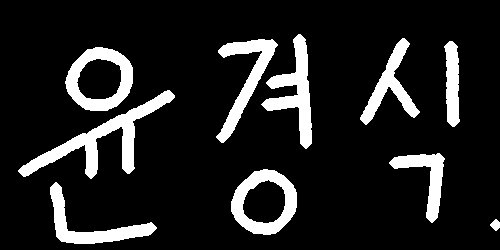

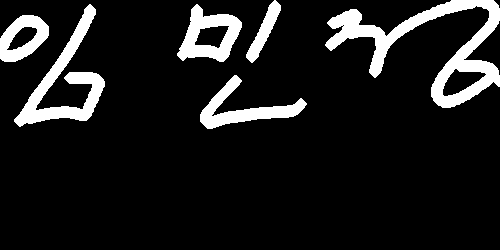

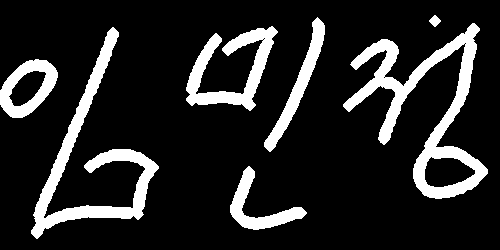

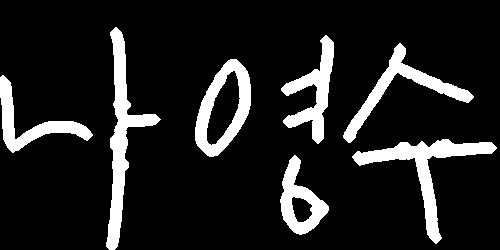

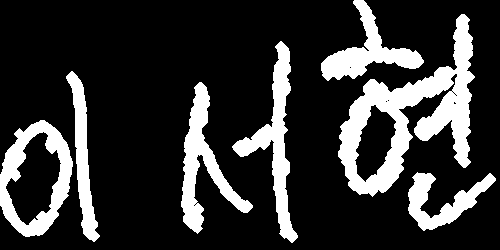

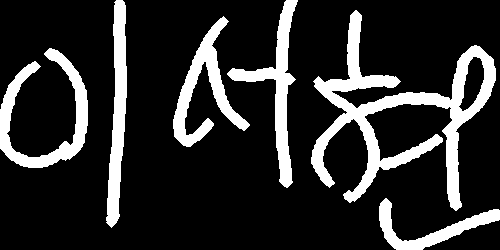

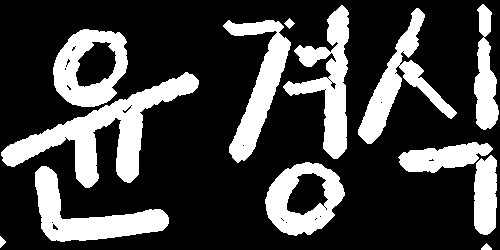

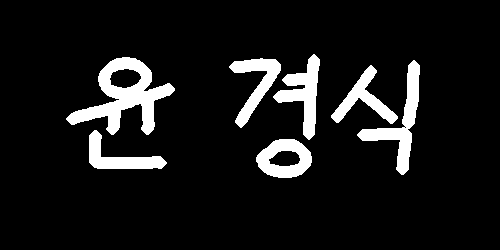

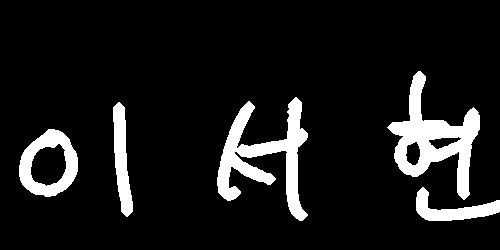

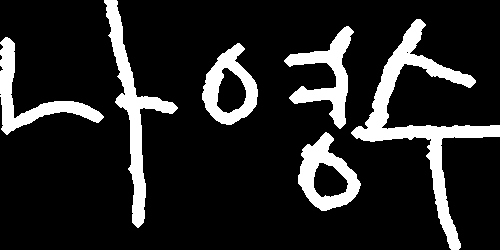

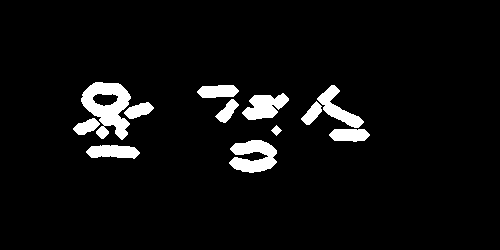

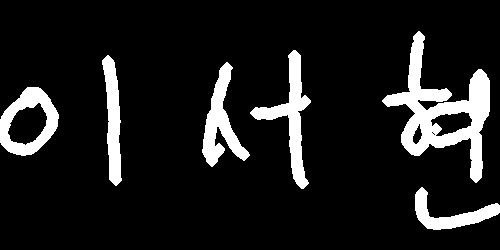

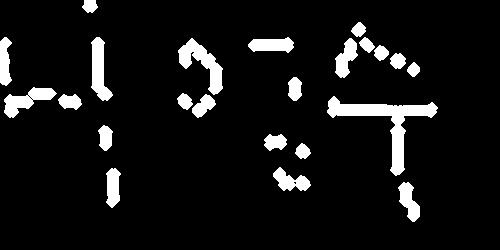

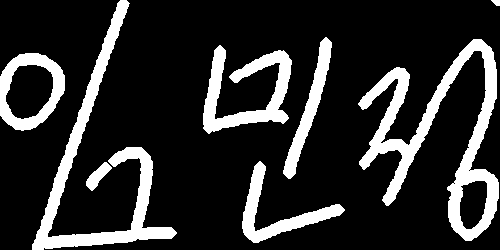

In [140]:
for i in range(len(img)):
  contours, hierarchy = cv2.findContours(img[i], cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  for cnt in contours:
    epsilon = 0.0005*cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    cv2.drawContours(img[i],[approx], 0, (255,255,255),2)

  cv2_imshow(img[i])

In [141]:
for i in range(len(img)):
  img[i] = cv2.bitwise_not(img[i])

  #print(model(img[i]))
  print(pytesseract.image_to_string(img[i],lang='Hangul'))




TDre
XO

XX)
/Ahil’





이 서현

5 D
O°

Ku
“인전
나 영 수
| 서

혀
w©

A : |
a ome

.
요 -
이 서 현
<
ㅠ
NO

of J

이 시 현

이서

이

>

0%,

“,

C¢

“~

o
< TT

곤 o

Ot)



나 영 수

<r
NX
O

XR)






윤 경식
이서 힌


이서 획


